In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import numpy_indexed as npi
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from scipy import stats

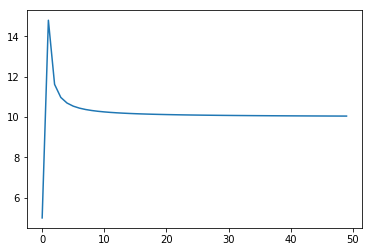

In [406]:
plt.plot(sectFit(np.linspace(0,1000),5,5,-10))


In [409]:
sectFit(10**6,4,5,-42)

9.000210008820371

In [237]:
def sectFit(t, a,b,c):
    return a+b*t*(t+c)**-1

def velocity(g, m, f):
    D = m/2.
    if f >= -0.5:
        v = np.sqrt(-D*g*f/2.)*(1 - 2.*f)
    else:
        v = 2.*np.sqrt(D*g*abs(f))
    return v

In [91]:
df_exp = pd.read_csv('rachaExpData.csv').iloc[:,1:]

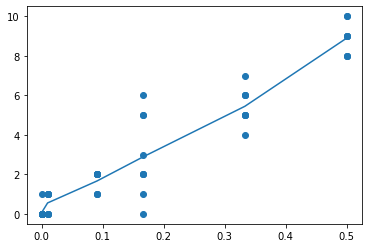

In [92]:
plt.scatter(np.repeat([df_exp['Frequency'].values[:-3]],9,axis=0),
            df_exp.values[:-3,3:].astype(int).T)

plt.plot(df_exp['Frequency'].values[:-3],np.mean(df_exp.values[:-3,3:].astype(int).T,axis=0 ))


In [116]:
Bspace = np.array([0,2.5,3, 3.5,5])
Ispace = np.array([ 30, 40, 50, 60,  70, 80, 90]).astype(int)

In [11]:

data = np.zeros(( len(Ispace) * len(Bspace)*100 , 4 ))
folder= '/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data_trial/sect*B'

k =0
B=3

for i, B in enumerate(Bspace):
    for j, I in enumerate(Ispace):
        if B % 1 ==0:
            B = int(B)


        proff = glob.glob(folder+str(B)+'_*U'+str(I)+'*')
        #print(len(proff))
        for f in proff[:100]:
            a_file = open(f, "r")
            l=int(f.split('I')[1].split('_')[0])
            lines = a_file.readlines()
            last_lines = lines[-1:]

            a_file. close()


            try:
                data[k] = [ B ,int(lines[0].split(' ')[0])  , l ,int( last_lines[0].split(' ')[-1] ) ]
            except:

                None
            k+=1


In [401]:
B = 2
I=160
proff = glob.glob(folder+str(B)+'_*U'+str(I)+'*')

for f in proff:
    plt.plot(np.loadtxt(f)[:,1])

In [13]:
df = pd.DataFrame(data , columns = ['B','I', 'ID', 'Sectors'])

In [14]:
df =df.loc[df['I']!=0,:]

In [15]:
df


,B,I,ID,Sectors
0,2.5,30.0,54.0,6.0
1,2.5,30.0,68.0,5.0
2,2.5,30.0,168.0,7.0
3,2.5,30.0,198.0,5.0
4,2.5,30.0,20.0,5.0
5,2.5,30.0,146.0,4.0
6,2.5,30.0,107.0,6.0
7,2.5,30.0,114.0,5.0
8,2.5,30.0,99.0,5.0
9,2.5,30.0,124.0,5.0


/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


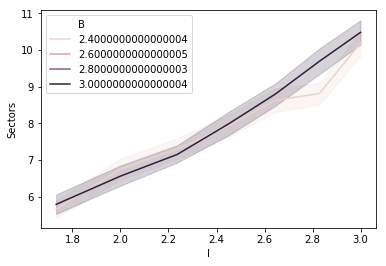

In [16]:

sns.lineplot(x=np.sqrt(df['I']/10) , y= df['Sectors'] , hue = df['B'])
#sns.scatterplot(x=np.sqrt(df['I']) , y= df['Sectors'] , hue = df['B'])

0.6783588767530374 -7.58611088614772
0.598540470694631 -33.5345518561431
0.5548830843820891 -5.6737679164085595
0.5510168409803397 -11.167473186812636
0.519140337395808 -15.172936161791185


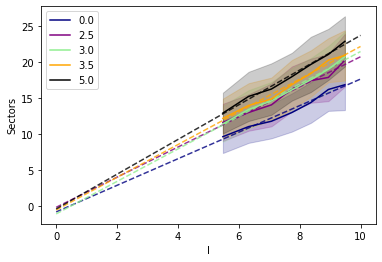

In [502]:
colors= ['Navy','Purple','lightgreen', 'Orange', 'Black']
H0 = .5
for i,B in enumerate(Bspace):

    X = np.sqrt((df.loc[df['B']==B, 'I']).values.reshape(-1, 1))  # values converts it into a numpy array
    Y = df.loc[df['B']==B, 'Sectors'].values.reshape(-1, 1) *2 # -1 means that calculate the dimension of rows, but have 1 column
    sns.lineplot(x=np.sqrt(df.loc[df['B']==B, 'I']),y=df.loc[df['B']==B, 'Sectors']*2 ,
                 color=colors[i],label=B,ci='sd')
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression

    #plt.scatter(np.mean(X,axis=0),np.mean(Y,axis=0))
    plt.plot(np.linspace(0,10),linear_regressor.coef_[0][0]*np.linspace(0,10) + linear_regressor.intercept_[0],
             color=colors[i],linestyle="--",alpha=.8)
    print(H0*(1/linear_regressor.coef_[0][0])*np.sqrt(2*np.pi),
          (1/linear_regressor.intercept_[0])*2*np.pi )

In [238]:
cov

NameError: name 'cov' is not defined

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: loadtxt: Empty input file: "/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data_trial/sect_K50_M0.1_B0_G0.5_U30_I193_2021-05-03-16-37-41.txt"
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: loadtxt: Empty input file: "/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data_trial/sect_K50_M0.1_B0_G0.5_U30_I52_2021-04-30-11-00-49.txt"


[ 4.50197945e-17  9.06618940e+00 -2.18854448e+01]
[ 7.51806477e-14  9.81865337e+00 -3.09910179e+01]
[ 5.25310371e-14  1.11429327e+01 -3.03580814e+01]
[ 1.40045192e-14  1.19141062e+01 -3.98431644e+01]
[ 2.32127439e-13  1.26560392e+01 -4.60360384e+01]
[ 1.10066833e-12  1.37869930e+01 -5.11526780e+01]
[ 3.03186293e-15  1.45459531e+01 -5.51861650e+01]
[ 1.05168778e-13  1.10095153e+01 -1.81985406e+01]
[ 3.94430471e-14  1.20341728e+01 -2.73065577e+01]
[ 2.00307115e-15  1.31397907e+01 -3.11021579e+01]
[ 6.48072453e-12  1.46017204e+01 -3.52311470e+01]
[ 1.64319426e-15  1.53202905e+01 -4.41545879e+01]
[ 4.75428037e-15  1.58407726e+01 -4.62068013e+01]
[ 2.32410254e-14  1.79445713e+01 -4.83693916e+01]
[ 1.37644663e-14  1.09010108e+01 -2.29571300e+01]
[ 9.78401427e-13  1.23434778e+01 -2.74481144e+01]
[ 6.81608405e-18  1.31565266e+01 -3.28506421e+01]
[ 2.58400662e-09  1.39466124e+01 -4.13086906e+01]
[ 1.12648741e-13  1.56892923e+01 -4.04054410e+01]
[ 3.00006418e-15  1.66081596e+01 -4.86316333e+01]


/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: loadtxt: Empty input file: "/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data_trial/sect_K50_M0.1_B5_G0.5_U70_I132_2021-05-05-23-13-02.txt"
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: loadtxt: Empty input file: "/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data_trial/sect_K50_M0.1_B5_G0.5_U70_I134_2021-05-06-00-31-23.txt"


[ 3.38149313e-08  1.82013908e+01 -3.17316430e+01]
[ 8.81972978e-09  1.87498748e+01 -4.38807508e+01]
[ 7.37269733e-17  2.05121349e+01 -4.11060235e+01]


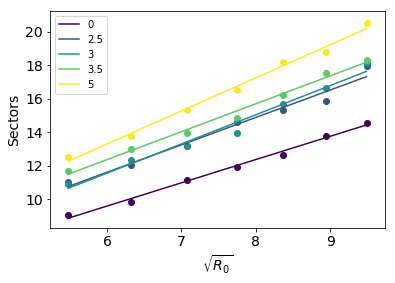

In [414]:
B = 0
I = 30 
#means=[]
Ninf = []
folder= '/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data_trial/sect*B'
colors = plt.cm.viridis(np.linspace(0,1,5))
data = []


for j, B in enumerate(Bspace):
    if B % 1 ==0:
        B = int(B)
    Ninf = []
    readcnt =0
    for i, I in enumerate(Ispace):
        datax=[]
        datay= []
        proff = glob.glob(folder+str(B)+'_*U'+str(I)+'*')
        readcnt =0
        for f in proff:
            try:
                datax.append(list(np.loadtxt(f)[:,0]))
                datay.append(list(np.loadtxt(f)[:,1]*2))
                vel = np.loadtxt(f)[-1,0] - np.loadtxt(f)[0,0] / len(np.loadtxt(f)[:,1])
                readcnt+=1 
                


            except:
                None
        x = np.concatenate(datax[:])
        y = np.concatenate(datay[:])
        x_unique, y_mean = npi.group_by(x).mean(y)

        #means.append([x_unique, y_mean])
        mPt = np.argmax(y_mean)
        bump = -1
        while (len(y_mean) - mPt) < 50:
            mPt = np.argwhere(y_mean==np.sort(y_mean)[bump])[0][0]
            bump-=1
        #print(mPt,len(y_mean))
        xfit = x[ np.argwhere(x > x_unique[mPt])].flatten()
        yfit = y [np.argwhere(x > x_unique[mPt]) ].flatten()
        popt,popc = curve_fit(sectFit, x_unique[mPt:],y_mean[mPt:],bounds = ([0,0,-100],[50,30,-10]),
                              absolute_sigma=True)
        perr = np.sqrt(np.diag(popc))
        

        #print(perr)
        Ninf.append(sectFit(10**6,*popt))
        #plt.scatter(I,sectFit(10**6,*popt))
        #plt.plot(x_unique[mPt:],sectFit(x_unique,*popt)[mPt:])
        print(popt)
    res = stats.linregress(np.sqrt(Ispace),Ninf)
    data.append([B, res.slope,res.intercept,res.rvalue**2, vel/readcnt])
    plt.scatter(np.sqrt(Ispace),Ninf,color=colors[j])
    plt.plot(np.sqrt(Ispace),np.sqrt(Ispace)*res.slope+res.intercept,label=B,color=colors[j])
plt.xlabel('$\sqrt{R_{0}}$',fontsize=14)
plt.ylabel('Sectors',fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.legend()

In [418]:
popt

array([ 7.37269733e-17,  2.05121349e+01, -4.11060235e+01])

In [419]:
df = pd.DataFrame(data,columns = ['B','Fitted slope','Fitted intercept','$R^2$','vel sim'])
H0=.5
g=.01
m=.2
D = m/2
df['Dg/v'] = (1/df['Fitted intercept'])*2*np.pi*H0
df['Ds/v'] = (1 / ((df['Fitted slope']/H0)**2))*2*np.pi

df['Dg'] = df['Dg/v']* df['vel sim']
df['Ds'] = df['Ds/v']* df['vel sim']

#df['vel theory'] = [] list(np.array([np.sqrt((g *D*B) /  2) * (1+2/B)  for B in Bspace[1:]]))

In [420]:
df.style.set_properties(**{'max-width': '80px', 'font-size': '12pt'}).set_precision(3)

,B,Fitted slope,Fitted intercept,$R^2$,vel sim,Dg/v,Ds/v,Dg,Ds
0,0,1.39,1.25,0.993,1.6,2.51,0.815,4.02,1.31
1,2.5,1.64,1.78,0.973,1.61,1.77,0.586,2.84,0.942
2,3,1.74,1.1,0.978,1.61,2.86,0.517,4.62,0.834
3,3.5,1.67,2.35,0.989,1.6,1.34,0.565,2.14,0.905
4,5,1.98,1.42,0.991,3.2,2.21,0.402,7.06,1.29


In [411]:
df['Ds/v']*df['vel sim']  / (df['Dg/v']*df['vel sim'])

0    0.080615
1    0.116822
2    0.039125
3    0.197557
4    0.025805
dtype: float64

In [281]:
vels = np.array([np.sqrt((g *D*B) /  2) * (1+2/B)  for B in Bspace])

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


array([0.06363961, 0.06454972, 0.06573757, 0.07      ])

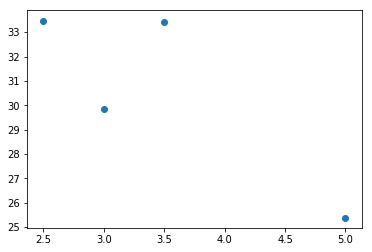

In [235]:
#plt.scatter(Bspace[1:], df['Dg/v'].values[1:])
vels = np.array([np.sqrt((g *D*B) /  2) * (1+2/B)  for B in Bspace])
plt.scatter(Bspace[1:], df['Ds/v'].values[1:]* vels[1:])


g=.01
m=.2
D = m/2
np.array([np.sqrt((g *D*B) /  2) * (1+2/B)  for B in Bspace[1:]])


In [259]:
 df['Ds/v'] /  df['Dg/v']

0    736.702070
1    645.723371
2    544.134327
3    679.377815
4    497.100157
dtype: float64

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: loadtxt: Empty input file: "/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data_trial/sect_K50_M0.1_B0_G0.5_U30_I193_2021-05-03-16-37-41.txt"
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: loadtxt: Empty input file: "/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data_trial/sect_K50_M0.1_B0_G0.5_U30_I52_2021-04-30-11-00-49.txt"


1.6305630563056304
52 294
1.6089743589743588
52 285
1.6136486486486488
39 275
1.6033425414364642
38 264
1.6129768786127168
35 256
1.602560975609756
33 247
1.6021698113207545
31 235


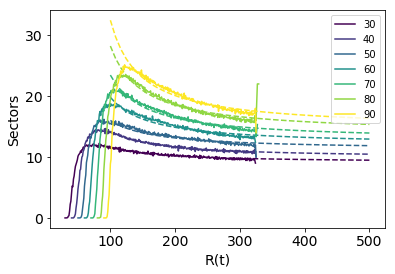

In [387]:
B = 0
I = 30 
#means=[]
Ninf = []
folder= '/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data_trial/sect*B'
colors = plt.cm.viridis(np.linspace(0,1,7))
#data = []
data= []

if B % 1 ==0:
    B = int(B)
Ninf = []
for i, I in enumerate(Ispace):
    datax=[]
    datay= []
    proff = glob.glob(folder+str(B)+'_*U'+str(I)+'*')
    readcnt=0
    for f in proff:
        try:
            datax.append(list(np.loadtxt(f)[:,0]))
            datay.append(list(np.loadtxt(f)[:,1]*2))
            vel = np.loadtxt(f)[-1,0] - np.loadtxt(f)[0,0] / len(np.loadtxt(f)[:,1])
            readcnt+=1 


        except:
            None
            
    print(vel/readcnt)
    x = np.concatenate(datax[:])
    y = np.concatenate(datay[:])
    x_unique, y_mean = npi.group_by(x).mean(y)

    #means.append([x_unique, y_mean])
    mPt = np.argmax(y_mean)
    
    bump = -1
    while (len(y_mean) - mPt) < 50:
        mPt = np.argwhere(y_mean==np.sort(y_mean)[bump])[0][0]
        bump-=1
    print(mPt,len(y_mean))
    
    xfit = x[ np.argwhere(x > x_unique[mPt])].flatten()
    yfit = y [np.argwhere(x > x_unique[mPt]) ].flatten()
    popt,popc = curve_fit(sectFit, x_unique[mPt:],y_mean[mPt:],bounds = ([0,0,-100],[1,50,0]))
    perr = np.sqrt(np.diag(popc))
    Ninf.append(sectFit(10**6,*popt))
    #plt.scatter(I,sectFit(10**6,*popt))

    plt.plot(np.linspace(100,500),sectFit(np.linspace(100,500),*popt),color=colors[i],linestyle= '--')
    plt.plot(x_unique,y_mean,color=colors[i],label=I)
    data.append([I] + list(popt)+list(perr))

res = stats.linregress(Ispace,Ninf)
#data.append([B, res.slope,res.intercept])
#plt.plot(Ispace,Ispace*res.slope+res.intercept,label=B)


plt.xlabel('R(t)',fontsize=14)
plt.ylabel('Sectors',fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.legend()

In [377]:
fitdf = pd.DataFrame(data,columns = ['Initial Radius', 'a','b','c','$\sigma_a$','$\sigma_b$','$\sigma_c$'])
fitdf[['Initial Radius','b','c','$\sigma_a$','$\sigma_b$','$\sigma_c$']]= round(fitdf[['Initial Radius','b','c','$\sigma_a$','$\sigma_b$','$\sigma_c$']],3)

In [386]:
fitdf.style.set_properties(**{'max-width': '80px', 'font-size': '12pt'}).set_precision(3)

,Initial Radius,a,b,c,$\sigma_a$,$\sigma_b$,$\sigma_c$
0,30,7.57e-17,9.07,-21.9,2.96,2.9,5.08
1,40,4.67e-17,9.82,-31,1.88,1.81,3.72
2,50,5.99e-15,11.1,-30.4,3.43,3.31,5.86
3,60,4.47e-16,11.9,-39.8,2.66,2.51,4.88
4,70,4.81e-15,12.7,-46,2.23,2.07,4.13
5,80,7.88e-11,13.8,-51.2,3.78,3.48,6.81
6,90,1.56e-18,14.5,-55.2,3.1,2.83,5.56


In [154]:
data 

[[2.5, 0.054646331598397505, 3.8565460088988988]]

In [196]:
for 

df.loc[(df['B']==5) & (df['I']==100)]

,B,I,ID,Sectors
9000,5.0,100.0,11.0,18.0
9001,5.0,100.0,31.0,13.0
9002,5.0,100.0,60.0,18.0
9003,5.0,100.0,43.0,13.0
9004,5.0,100.0,22.0,12.0
...,...,...,...,...
9095,5.0,100.0,98.0,17.0
9096,5.0,100.0,94.0,17.0
9097,5.0,100.0,69.0,13.0
9098,5.0,100.0,8.0,11.0


In [ ]:
B  = 0 
I = 100
for i,B in enumerate(Bspace):
    for j, I in enumerate(Ispace):
        df

In [187]:
proff = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data/sect*')

Bspace = np.array([1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.5])


In [4]:
proff = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data/sect*')

proff

['/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data/sect_K500000_M0.002_B1.5_G0.5_U200000_I2800_2021-04-19-22-39-47.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data/sect_K500000_M0.002_B2_G0.5_U200000_I2000_2021-04-20-01-00-21.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data/sect_K500000_M0.002_B2_G0.5_U175000_I12950_2021-04-20-00-57-13.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data/sect_K500000_M0.002_B3.5_G0.5_U200000_I9200_2021-04-20-03-32-26.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data/sect_K500000_M0.002_B3.5_G0.5_U225000_I1350_2021-04-20-03-35-53.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data/sect_K500000_M0.002_B1.5_G0.5_U200000_I15200_2021-04-19-22-43-50.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data/s

In [188]:
Lsim = np.sqrt(.05)
Le = 33.7
r0=2.5


In [189]:
(2.5*1000/33.7)*Lsim

16.5880413761112

1.5
1.75
2
2.25
2.5
2.75
3
3.25
3.5
4
4.5


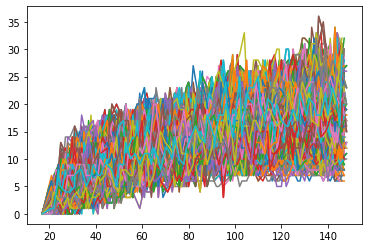

In [192]:

datax = [[],[],[],[],[],[],[],[],[],[],[]]
datay = [[],[],[],[],[],[],[],[],[],[],[]]
for i,B in enumerate(Bspace.astype(float)):
    if B % 1 ==0:
        B = int(B)
    
    print(str(B))
    proff = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data/sect*B'+str(B)+'*')
    for f in proff:
        datax[i].append(list(np.loadtxt(f)[:,0]))
        datay[i].append(list(np.loadtxt(f)[:,1]))
        plt.plot(np.loadtxt(f)[:,0],np.loadtxt(f)[:,1])

        


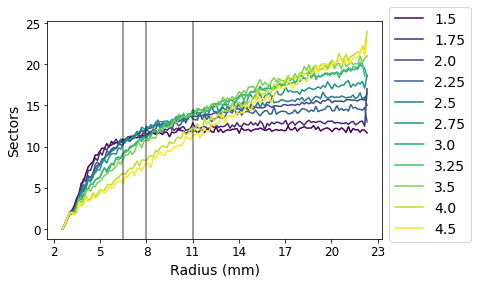

In [229]:
fig,ax=plt.subplots()

colors = plt.cm.viridis(np.linspace(0,1,11))
means =[]

for i in range(len(Bspace)):
    try:
        x = np.concatenate(datax[i][:])
        y = np.concatenate(datay[i][:])
        x_unique, y_mean = npi.group_by(x).mean(y)
        means.append([x_unique, y_mean])
        
        ax.plot( x_unique, y_mean, label=Bspace[i],color=colors[i]
               )
    except:
        
        None
        
        
ax.legend(bbox_to_anchor=(1,1.1),fontsize=14)
ax.set_xticks(Lsim*np.array([2,5,8,11, 14,17,20,23])*1000/Le )
ax.set_xticklabels([2,5,8,11, 14,17,20,23],fontsize=12)

ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Radius (mm)',fontsize=14)


ax.set_ylabel('Sectors',fontsize=14)

#ax.axvline(5.5*Lsim*1000/Le) 

ax.axvline(6.5*Lsim*1000/Le,c='k',alpha=.5)

ax.axvline(8*Lsim*1000/Le,c='k',alpha=.5)
ax.axvline(11*Lsim*1000/Le,c='k',alpha=.5)

plt.rcParams['figure.facecolor'] = 'white'

In [194]:
(np.linspace(20,140,7)/Lsim)* Le / 1000

array([ 3.01421963,  6.02843927,  9.0426589 , 12.05687853, 15.07109817,
       18.0853178 , 21.09953744])

In [195]:
Lsim*np.array([2,5,8,11, 14,17,20])*1000/Le 


array([ 13.2704331 ,  33.17608275,  53.0817324 ,  72.98738205,
        92.89303171, 112.79868136, 132.70433101])

In [166]:
ax.set_xticks(np.linspace(20,140,7))

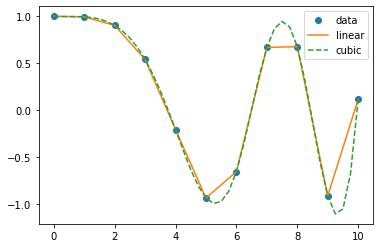

In [218]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [137]:
from scipy import interpolate

In [143]:
f = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/prof*')[0]
arr= np.loadtxt(f)
nDemes=500


In [144]:
popArr = arr[:,2:].reshape((nDemes,nDemes,2))

In [145]:
wtArr = popArr[:,:,0]
mutArr= popArr[:,:,1]


In [146]:
freqArr = wtArr /( wtArr+mutArr)

<ipython-input-146-137e27fd3023>:1: RuntimeWarning: invalid value encountered in true_divide
  freqArr = wtArr /( wtArr+mutArr)


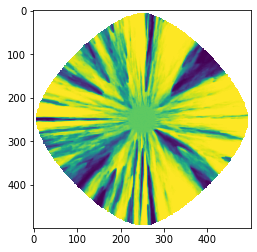

In [147]:
plt.imshow(freqArr)

In [121]:
def floodFill()

SyntaxError: invalid syntax (<ipython-input-121-25e50d6ec3f4>, line 1)

In [113]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [121]:
def floodfill(matrix, x, y,val):
    #"hidden" stop clause - not reinvoking for "c" or "b", only for "a".
    
    if matrix[x][y] == val :  
        matrix[x][y] = "-1" 
        #recursively invoke flood fill on all surrounding cells:
        if x > 0:
            floodfill(matrix,x-1,y)
        if x < len(matrix[y]) - 1:
            floodfill(matrix,x+1,y)
        if y > 0:
            floodfill(matrix,x,y-1)
        if y < len(matrix) - 1:
            floodfill(matrix,x,y+1)

NameError: name 'cv2' is not defined

In [126]:
np.nan is np.nan

True